# BANKING MARKETING

<b>Import libraries </b>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics



Using TensorFlow backend.
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:

from sklearn.externals import joblib 

C:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


<b>Read data set</b>

In [3]:
X_train=pd.read_csv('Banking_Marketing_X_train.csv')

In [4]:
Y_train=pd.read_csv('Banking_Marketing_Y__train.csv')

In [5]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,29,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,thu,11,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,121,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,163,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,131,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Replce 'unknown' with null values

In [6]:
X_train.replace('unknown', np.nan,inplace=True)

In [7]:
X_train.shape

(32950, 20)

In [8]:
X_train.isna().sum()

age                  0
job                241
marital             58
education         1381
default           6879
housing            809
loan               809
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

In [9]:
print("shape of Y_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)

shape of Y_train: (32950, 20)
shape of Y_train: (32949, 1)


so we can find that one row is missing in Y_train

In [10]:
Y_train.rename(columns={'no':'target'},inplace=True)

In [11]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.016237,257.292595,2.563217,962.262853,0.172929,0.084121,93.574054,-40.498410,3.624656,5167.205536
std,10.417175,257.533638,2.779032,187.436936,0.496143,1.570289,0.577409,4.626653,1.733065,72.170613
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
a=[X_train,Y_train]
data=pd.concat(a,axis=1,sort=False)

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1,29,blue-collar,married,basic.9y,NaN,yes,yes,cellular,may,thu,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
data.shape

(32950, 21)

duplicate rows 

In [15]:
data_duplicated=data[data.duplicated(keep='last')]
data_duplicated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
5445,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
9362,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
11008,55,services,married,high.school,NaN,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
12180,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
19857,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [16]:

print("rows to be removed :",data_duplicated.shape[0])

rows to be removed : 5


In [17]:
data.drop_duplicates(data.columns,keep='last',inplace=True)

In [18]:
data.shape

(32945, 21)

<b>Exploratory Data analysis</b>

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


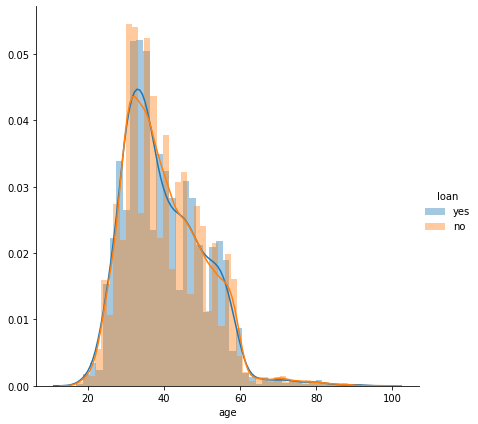

In [19]:
sns.FacetGrid(data,hue='loan',size=6).map(sns.distplot,'age').add_legend()

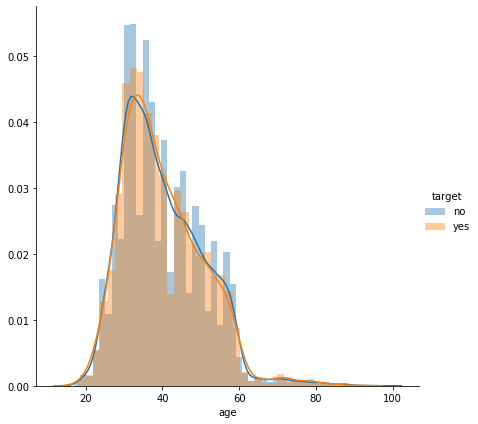

In [20]:
sns.FacetGrid(data,hue='target',size=6).map(sns.distplot,'age').add_legend()

In [21]:
data_age=data[['age','target']]

In [22]:
def func(d):
    if d['age']<22:
        return 'young'
    elif (d['age']<45 | d['age']>24):
        return 'Adults'
    else:
        return 'old'

In [23]:
data_age['Age']=data_age.apply(func,axis=1)


C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_age.drop(columns='age',inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


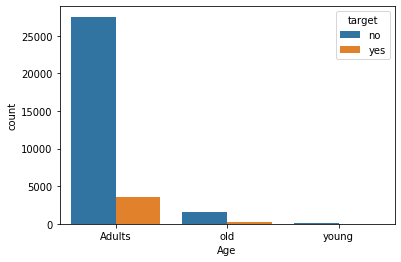

In [25]:
sns.countplot(x=data_age['Age'],hue='target',data=data_age)

In [26]:
data_age.Age.value_counts()

Adults    31020
old        1736
young       189
Name: Age, dtype: int64

We can see that age between 25 to 60 has a low subscription of term deposit compare to those below 25 and above 60

This explains the above graph which age between 25 to 60 has a low subscription of term deposit because they have housing loan and bank loan. This means that the customer has a financial compromises to pay back its house loan and bank loan. Therefore, there is no cash for he or she to subscribe to a term deposit account. 
People over 60 are mostly retired people who tend to have more term deposits in order to gain interest payments.

no     29245
yes     3699
Name: target, dtype: int64

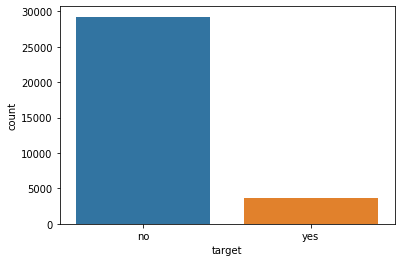

In [27]:
sns.countplot(x='target',data=data)
data.target.value_counts()

In [28]:
data_no=(data.target.value_counts()[0]/len(data.target))*100
data_yes=(data.target.value_counts()[1]/len(data.target))*100
print("no:{0} yes:{1}".format(data_no,data_yes))


no:88.76916072241615 yes:11.227803915616938


Data is Imbalance because around 80% values are of no .Hence, in futher steps let us use sampling techiques

In [29]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

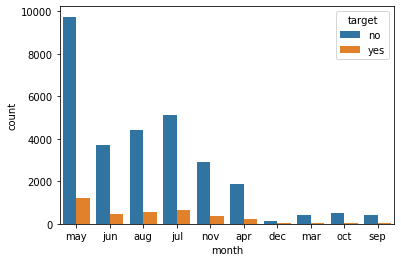

In [30]:
sns.countplot(x=data['month'],hue='target',data=data)

The graph showed that between march to april people are more likely to subscribe to term deposit. 

(0, 103.0061533193623)

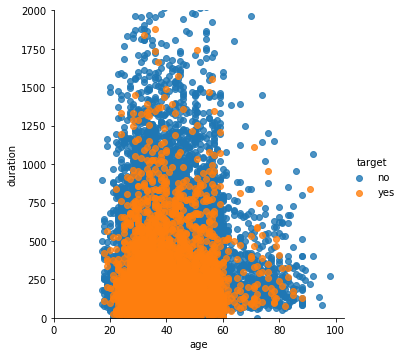

In [31]:
sns.lmplot(x='age', y='duration', data=data,fit_reg=False, hue='target')
 
# Tweak using Matplotlib
plt.ylim(0, 2000)
plt.xlim(0, None)




People who said yes to term deposit: Throughout the people who subscribe to term deposit, most people are in age 35 with receiving calls of 250 seconds.

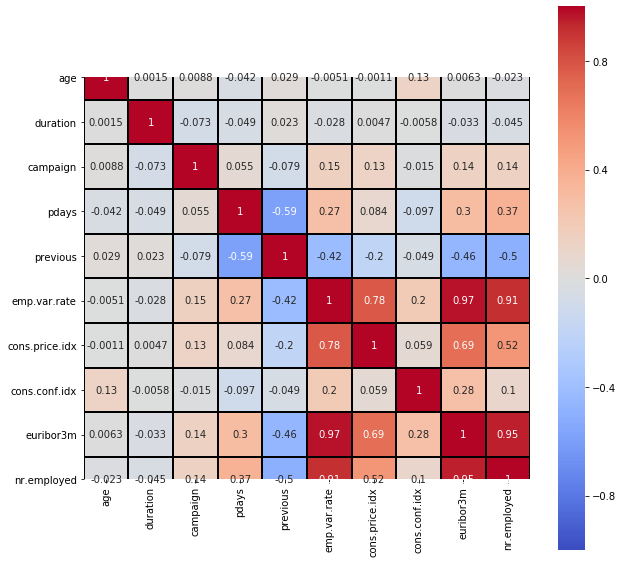

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1,square=True, center= 0,cmap= 'coolwarm', linewidths=1, linecolor='black')
plt.show()

 # social and economic context attributes are highly correlated to eachother
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)


In [33]:
data[data.target.isnull()].index[0]

32949

In [34]:
data.drop(data[data.target.isnull()].index[0],inplace=True)

In [35]:
data.shape

(32944, 21)

In [36]:
data.target.isnull().sum()

0

In [37]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [38]:
data.isnull().sum()

age                  0
job                241
marital             58
education         1381
default           6878
housing            809
loan               809
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
target               0
dtype: int64

In [39]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000,32944.000000
mean,40.015147,257.318389,2.563471,962.256162,0.172960,0.084082,93.574100,-40.499302,3.624569,5167.202944
std,10.416275,257.549422,2.779217,187.453349,0.496183,1.570254,0.577417,4.626215,1.733087,72.169841
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


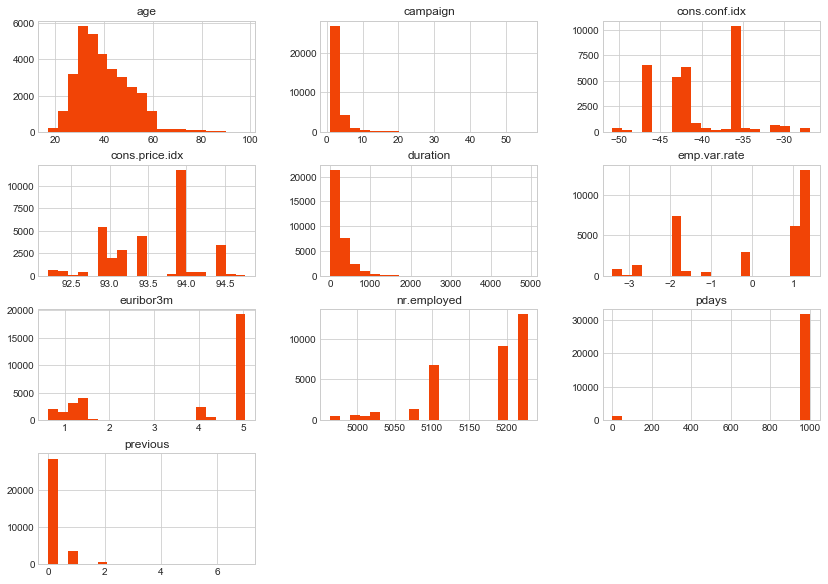

In [40]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#F14406')
plt.show()

In [41]:
def countplot_withY(label, dataset):
    plt.figure(figsize=(10,10))
    Y = dataset[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="target")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    #plt.savefig(label)
  # ax.legend(labels=["no","yes"])
    plt.show()
    

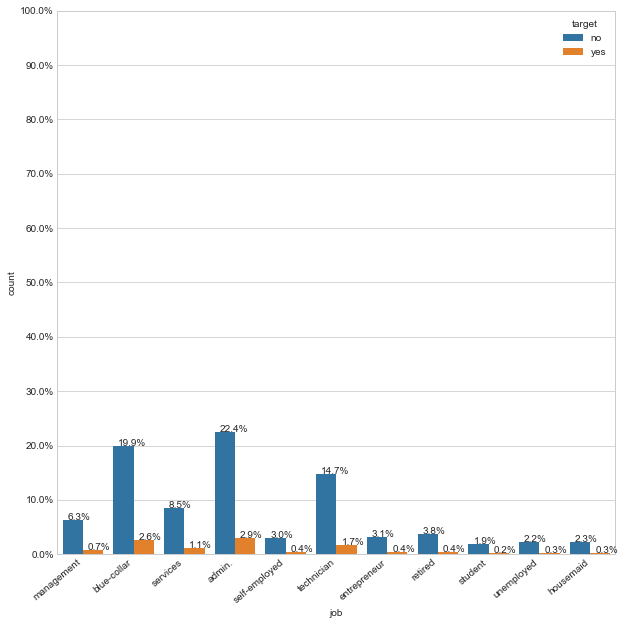

In [42]:
countplot_withY("job",data)

Review:Due to data is imbalance it hard to compare values or we can select same number rows for each different jobs and compare.From this we can say that bank has mainly concerated on blue-collar,admin and technicians

In [43]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

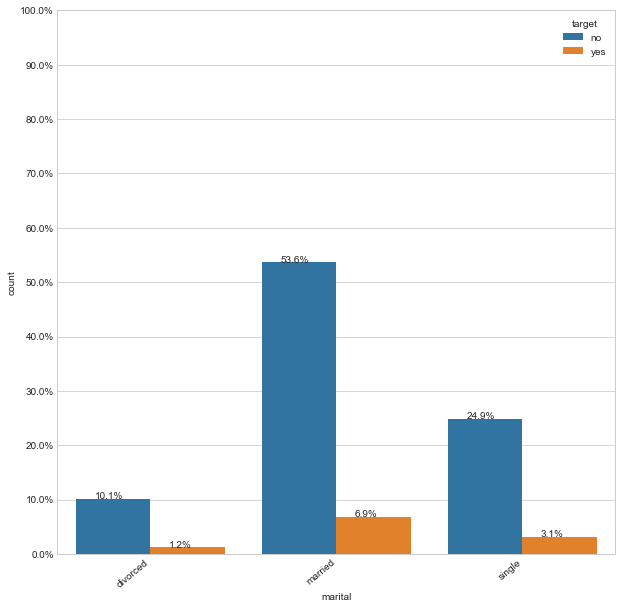

In [44]:
countplot_withY('marital',data)

Review=Married persons mainly suscribe for term deposit

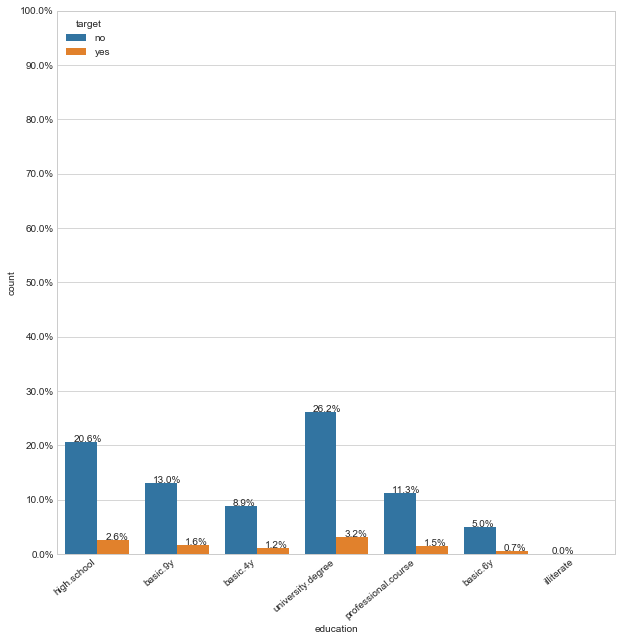

In [45]:
countplot_withY('education',data)

In [46]:
(data.education.value_counts()/len(data.education))*100

university.degree      29.434798
high.school            23.215153
basic.9y               14.633924
professional.course    12.773191
basic.4y               10.059495
basic.6y                5.652016
illiterate              0.039461
Name: education, dtype: float64

Review:From the data ,marketing team mainly contacted  people with education level high school and university degree and we can drop na null related to illiterate it doesnot contribute much
    

In [47]:
data.groupby(["job","target"]).count().reset_index()

,job,target,age,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,admin.,no,7387,7378,7208,6470,7214,7214,7387,7387,...,7387,7387,7387,7387,7387,7387,7387,7387,7387,7387
1,admin.,yes,957,955,937,833,939,939,957,957,...,957,957,957,957,957,957,957,957,957,957
2,blue-collar,no,6552,6541,6240,4335,6378,6378,6552,6552,...,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552
3,blue-collar,yes,864,864,817,533,840,840,864,864,...,864,864,864,864,864,864,864,864,864,864
4,entrepreneur,no,1035,1033,990,825,1009,1009,1035,1035,...,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035
5,entrepreneur,yes,130,130,125,103,126,126,130,130,...,130,130,130,130,130,130,130,130,130,130
6,housemaid,no,742,739,712,525,725,725,742,742,...,742,742,742,742,742,742,742,742,742,742
7,housemaid,yes,99,99,96,72,98,98,99,99,...,99,99,99,99,99,99,99,99,99,99
8,management,no,2075,2074,1984,1753,2025,2025,2075,2075,...,2075,2075,2075,2075,2075,2075,2075,2075,2075,2075
9,management,yes,246,245,236,205,240,240,246,246,...,246,246,246,246,246,246,246,246,246,246


In [48]:
data.drop(data[data.education=='illiterate'].isna().index,inplace=True)

In [49]:
data.isna().sum()

age                  0
job                241
marital             58
education         1381
default           6873
housing            809
loan               809
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
target               0
dtype: int64

In [50]:
fillmissing=['job', 'marital', 'education']

In [51]:
for i in range(len(fillmissing)):
    print(((data[fillmissing[i]].value_counts())/(len(data[fillmissing[i]])))*100)
    print("**"*25)

admin.           25.334791
blue-collar      22.504631
technician       16.449546
services          9.614041
management        7.048070
retired           4.196654
entrepreneur      3.534663
self-employed     3.410161
housemaid         2.553825
unemployed        2.511312
student           2.110473
Name: job, dtype: float64
**************************************************
married     60.517446
single      28.016155
divorced    11.290274
Name: marital, dtype: float64
**************************************************
university.degree      29.446418
high.school            23.224318
basic.9y               14.639701
professional.course    12.778233
basic.4y               10.063466
basic.6y                5.654247
Name: education, dtype: float64
**************************************************


loan and default missing values can be filled by most frequent values because 80% of values are frequent

In [52]:
data['loan'].fillna(data['loan'].value_counts().index[0],inplace=True)
data['default'].fillna(data['default'].value_counts().index[0],inplace=True)

In [53]:
data.housing.describe()

count     32122
unique        2
top         yes
freq      17271
Name: housing, dtype: object

In [54]:
data.housing.unique()

array(['no', 'yes', nan], dtype=object)

In [55]:
a={'yes':1,'no':0}
data['housing']=data['housing'].map(a)

In [56]:
data.housing.unique()

array([ 0.,  1., nan])

In [57]:

a=round(data.housing.median())


In [58]:
data.housing.fillna(value=a,inplace=True)

In [59]:
data.housing.isna().sum()

0

In [60]:
a={1:'yes',0:'no'}
data['housing']=data['housing'].map(a)

In [61]:
data.shape

(32931, 21)

In [62]:
a={'yes':1,'no':0}
data['target']=data['target'].map(a)

In [63]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
1,29,blue-collar,married,basic.9y,no,yes,yes,cellular,may,thu,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [64]:
#pd.where(a&b)


In [65]:
data.dropna(inplace=True)


In [66]:
print('final data shape without null values:',data.shape)

final data shape without null values: (31356, 21)


In [67]:
encode_lable=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [68]:

label=LabelEncoder()
for i in encode_lable:
    data[i]=label.fit_transform(data[i])

In [69]:
data.to_csv('cleaned_data.csv')

In [70]:
X=data.drop(columns='target')
y=data.target

In [71]:

nm=RandomOverSampler(random_state=42)
X_res,y_res=nm.fit_sample(X,y)

In [72]:

print(X_res.shape)

print(y_res.shape)

(55672, 20)
(55672,)


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size = 0.25, random_state = 0)

In [74]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [75]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)


tree_clf .fit(X_train,y_train)

y_pred = tree_clf .predict(X_test)


print("Accuracy of Decision Tree:", metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree: 0.921468601810605


In [76]:
log_clf =LogisticRegression()


log_clf.fit(X_train,y_train)

y_pred = log_clf.predict(X_test)


print("Accuracy of LogisticRegression:", metrics.accuracy_score(y_test, y_pred))

Accuracy of LogisticRegression: 0.5177468027015376


In [77]:
classifier =RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)

classifier.fit(X_train,y_train)

y_pred =classifier.predict(X_test)


print("Accuracy of RandomForest:", metrics.accuracy_score(y_test, y_pred))

Accuracy of RandomForest: 0.9816065526656129


In [78]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6730
           1       1.00      0.97      0.98      7188

    accuracy                           0.98     13918
   macro avg       0.98      0.98      0.98     13918
weighted avg       0.98      0.98      0.98     13918



Receiver Operating Characteristic or Area Under curve

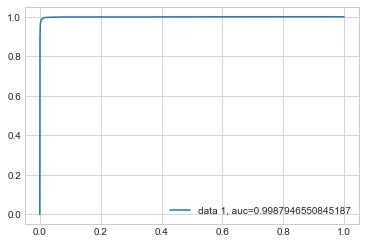

In [79]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [80]:
probs=classifier.predict_proba(X_test)
preds=probs[:,1]

In [81]:
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)

In [82]:
roc_auc=metrics.auc(fpr,tpr)

<function matplotlib.pyplot.show(*args, **kw)>

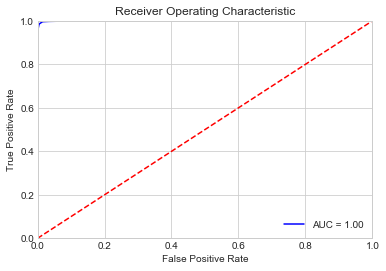

In [83]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


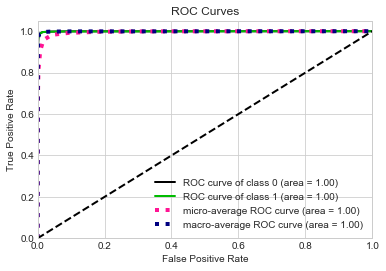

In [84]:



y_true = y_test
y_probas = probs
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [85]:
from sklearn.feature_selection import SelectFromModel

In [86]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [87]:
X_res.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [88]:
sel.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False])

In [89]:
selected_feat= X_res.columns[(sel.get_support())]
len(selected_feat)

7

In [90]:
print(selected_feat)

Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'euribor3m'],
      dtype='object')


Save the model to predict test data

In [91]:

  
# Save the model as a pickle in a file 
joblib.dump(classifier, 'model.pkl') 
  
# Load the model from the file 
model = joblib.load('model.pkl')  
  
 

In [92]:
test_data=pd.read_csv("Banking_Marketing_X_test.csv")

In [93]:
test_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,53,unemployed,married,unknown,unknown,no,no,telephone,may,thu,202,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
1,51,technician,married,high.school,unknown,unknown,unknown,cellular,aug,wed,637,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1
2,36,admin.,married,university.degree,no,yes,yes,cellular,may,thu,1178,1,6,2,success,-1.8,93.876,-40.0,0.699,5008.7
3,32,admin.,single,university.degree,unknown,no,no,cellular,aug,tue,240,5,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
4,50,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,93,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


In [94]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
# Use the loaded model to make predictions 
y_pred=model.predict(X_test)

<b>Test data prediction</b>

In [96]:
encode_lable=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


label=LabelEncoder()
for i in encode_lable:
    test_data[i]=label.fit_transform(test_data[i])

In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 20 columns):
age               8238 non-null int64
job               8238 non-null int32
marital           8238 non-null int32
education         8238 non-null int32
default           8238 non-null int32
housing           8238 non-null int32
loan              8238 non-null int32
contact           8238 non-null int32
month             8238 non-null int32
day_of_week       8238 non-null int32
duration          8238 non-null int64
campaign          8238 non-null int64
pdays             8238 non-null int64
previous          8238 non-null int64
poutcome          8238 non-null int32
emp.var.rate      8238 non-null float64
cons.price.idx    8238 non-null float64
cons.conf.idx     8238 non-null float64
euribor3m         8238 non-null float64
nr.employed       8238 non-null float64
dtypes: float64(5), int32(10), int64(5)
memory usage: 965.5 KB


In [98]:
sc_X = StandardScaler()
test = sc_X.fit_transform(test_data)

In [99]:
y_pred=model.predict(test)

In [100]:
df1 = pd.DataFrame(y_pred)

In [101]:
df1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [102]:
df1.rename(columns={0:'Predicted'},inplace=True)

In [103]:
a={1:'yes',0:'no'}
df1['Predicted']=df1['Predicted'].map(a)

In [104]:
df1.head()

,Predicted
0,no
1,no
2,no
3,no
4,no


In [105]:
df1.Predicted.value_counts()

no     7962
yes     276
Name: Predicted, dtype: int64

In [106]:
df1.to_csv('predicted_values.csv')

In [107]:
#sns.scatterplot(x='age',y='loan',hue='target',data=data)

<b>CONCLUSIONS</b>

<b>Age:</b> The bank should target adult people who is between 30 and above.

<b>Month of Marketing Activity:</b> Since March, September, October and December has a higher acceptance rate, the bank should focus on those months instead of May which has the highest marketing activity.

<b> Duration: </b> Duration has positive effect on making people to subscribe the term deposit. This is because the longer the conversations on the phone, the higher interest the customer will show to the term deposit. Thinking of ways to make the call interesting is an important part for the next marking campaign.

#Suggest how to deploy and operationalize it :

make use of Random Forest Classifier

These are important features in predicting the term deposit <b>'age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m'</b>



This can be impleted as a search in the database and generate report and contact those people who can be suscribe for term deposit

 Also user can make use of the saved model and predict the outcome i.e., to classify whether the user will suscribe for term deposit or not